# Python: Lab 05 Forecasting with Prophet, ARIMA, and Other Models Using StatsForecast




การพยากรณ์ (Forecasting) ถือเป็นหนึ่งในเครื่องมือสำคัญที่นักวิเคราะห์ข้อมูลควรมีติดตัว ในบทบาทของนักวิเคราะห์ คุณมักจะได้รับมอบหมายให้คาดการณ์ค่าต่าง ๆ เช่น ตัวชี้วัดความสำเร็จทางธุรกิจ (KPIs) เพื่อใช้ในการวางแผนล่วงหน้า

ในบทนี้ เราจะเริ่มจากการเรียนรู้ว่าเหตุใดการพยากรณ์จึงมีความสำคัญในงานวิเคราะห์การตลาด และการพยากรณ์สามารถช่วยให้ธุรกิจวางแผนอนาคตอย่างมีข้อมูลสนับสนุนได้อย่างไร จากนั้นเราจะเรียนรู้วิธีเลือก KPIs และปัจจัยอื่น ๆ ที่ควรนำมาพยากรณ์ในบริบทของงานการตลาด

ต่อมา เราจะทำความเข้าใจพื้นฐานของข้อมูลอนุกรมเวลา (Time Series Data) และวิธีการพยากรณ์แบบพื้นฐาน ก่อนจะไปสู่การเรียนรู้เทคนิคการพยากรณ์ขั้นสูง รวมถึงการใช้ แมชชีนเลิร์นนิง ในการพยากรณ์ พร้อมคำแนะนำว่าแต่ละวิธีเหมาะใช้ในสถานการณ์แบบใด

หัวข้อที่เราจะเรียนรู้ในบทนี้ ได้แก่:

- การพยากรณ์คืออะไร?

- สิ่งที่ควรนำมาพยากรณ์

- พื้นฐานของการพยากรณ์ข้อมูลอนุกรมเวลา

- วิธีการพยากรณ์ขั้นสูง
---

การพยากรณ์คืออะไร?
การพยากรณ์ (Forecasting) คือกระบวนการในการคาดการณ์สิ่งที่จะเกิดขึ้นในอนาคต ถือเป็นงานที่สำคัญอย่างหนึ่งของนักวิเคราะห์ข้อมูลทางการตลาด และยังเป็นหนึ่งในสาขาที่ซับซ้อนที่สุดของสถิติอีกด้วย
พวกเราควรเข้าใจว่าโมเดลแบบไหนเหมาะจะใช้เมื่อใด และควรหลีกเลี่ยงอะไรบ้างในการพยากรณ์


**ทำไมการพยากรณ์จึงสำคัญ**
การพยากรณ์มีความสำคัญเพราะช่วยให้เราสามารถตัดสินใจโดยอิงจากแนวโน้มในอนาคตได้
ยกตัวอย่างเช่น หากคุณเป็นนักวิเคราะห์ข้อมูลการตลาด คุณสามารถใช้การพยากรณ์เพื่อคาดการณ์ยอดขายของไตรมาสถัดไป
ข้อมูลนี้จะช่วยให้คุณวางแผนได้ว่า

- ควรสั่งสินค้าจำนวนเท่าใด

- ควรจ้างพนักงานเพิ่มอีกกี่คน

- และควรใช้งบโฆษณาเท่าใดจึงจะเหมาะสม

**📝 Note:**
ก่อนที่เราจะลงมือพยากรณ์ เราจำเป็นต้องเข้าใจก่อนว่า 
- ข้อมูลอนุกรมเวลา (Time Series Data) มีลักษณะแบบใดบ้าง 
- และต้องรู้วิธีการสำรวจข้อมูลเบื้องต้น (Exploratory Analysis) เพื่อดูแนวโน้ม รูปแบบ และความเปลี่ยนแปลงของข้อมูลเหล่านี้


**ประเภทของข้อมูลอนุกรมเวลา (Time Series Data)**

ข้อมูลอนุกรมเวลา คือข้อมูลที่บันทึกตามช่วงเวลา ซึ่งมีลักษณะและความซับซ้อนหลากหลาย การเข้าใจประเภทของข้อมูลอนุกรมเวลาจะช่วยให้เลือกโมเดลพยากรณ์ได้เหมาะสมและแม่นยำมากขึ้น ประเภทหลัก ๆ มีดังนี้:

---

### 1. ข้อมูลอนุกรมเวลาแบบตัวแปรเดียว (Univariate Time Series)
- เก็บค่าของ **ตัวแปรเดียว** ต่อเนื่องตามเวลา  
- ตัวอย่าง:  
    - ยอดขายรายเดือนของสินค้าชนิดหนึ่ง  
    - ราคาปิดของหุ้นในแต่ละวัน  
- การวิเคราะห์จะใช้ข้อมูลอดีตและปัจจุบันของ *ตัวแปรเดียว* เท่านั้น

---

### 2. ข้อมูลอนุกรมเวลาแบบหลายตัวแปร (Multivariate Time Series)
- เก็บค่าของ **หลายตัวแปร** ในช่วงเวลาเดียวกัน  
- ตัวอย่าง:  
    - บันทึกอุณหภูมิ ความชื้น และความเร็วลมรายวันของสถานที่หนึ่ง  
- การวิเคราะห์จะมองความสัมพันธ์ระหว่างตัวแปรต่าง ๆ เพื่อช่วยในการพยากรณ์

---

### 3. ข้อมูลแผง (Panel Data) หรือ Longitudinal/Cross-sectional Time Series
- มี **หลายอนุกรมเวลา** ของสิ่งเดียวกัน  
- ตัวอย่าง:  
    - ยอดขายรายเดือนของแต่ละสาขาในเครือร้านค้าเดียวกัน  
- ช่วยให้เข้าใจทั้งพฤติกรรมรายหน่วย (แต่ละร้าน) และแนวโน้มตามเวลา

---

### 4. ข้อมูลอนุกรมเวลาแบบมีลำดับชั้น (Hierarchical Time Series)
- มีโครงสร้างแบบลำดับขั้น  
- ตัวอย่าง:  
    - ยอดขายแยกตามสินค้า หมวดสินค้า ร้านค้า หรือภูมิภาค  
- สามารถรวม (Aggregate) หรือแยกย่อย (Disaggregate) ข้อมูลได้ตามระดับ  
- การพยากรณ์แบบนี้ช่วยให้วางแผนธุรกิจได้แม่นยำยิ่งขึ้น

---

### 5. ข้อมูลอนุกรมเวลาแบบมีฤดูกาล (Seasonal Time Series)
- มีรูปแบบซ้ำในรอบเวลาที่แน่นอน (เช่น รายวัน รายสัปดาห์ รายปี)  
- ตัวอย่าง:  
    - ยอดขายที่สูงขึ้นในช่วงเทศกาล  
    - การเข้าใช้งานเว็บไซต์ที่ลดลงในวันหยุด  
- การรู้จักฤดูกาลของข้อมูลช่วยให้พยากรณ์ได้แม่นขึ้น เช่น ใช้ SARIMA หรือ Holt–Winters

---

### 6. ข้อมูลอนุกรมเวลาแบบไม่เสถียร (Non-Stationary Time Series)
- คุณสมบัติเปลี่ยนแปลงไปตามเวลา (เช่น ค่าเฉลี่ย ความแปรปรวน หรือฤดูกาล)  
- ตัวอย่าง:  
    - ราคาหุ้น  
    - ตัวชี้วัดเศรษฐกิจ  
    - จำนวนประชากรที่เปลี่ยนไปทุกปี  
- มักต้องแปลงข้อมูลก่อน เช่น ใช้การหาค่าความต่าง (Differencing) เพื่อทำให้ข้อมูลเสถียรก่อนนำไปพยากรณ์

---

**📝 Note:**

ก่อนที่จะเริ่มการวิเคราะห์ข้อมูลใด ๆ เราควรเริ่มจาก การสำรวจข้อมูลเบื้องต้น (Exploratory Data Analysis) ก่อนเสมอ เพื่อทำความเข้าใจโครงสร้าง แนวโน้ม และรูปแบบของชุดข้อมูลของเรา

# Time Series ด้วยโมเดล ARIMA
**การสำรวจข้อมูลอนุกรมเวลา (Time Series data)** คือ การสำรวจชุดของข้อมูลที่เก็บรวบรวมตามกาลเวลาโดยจะเป็นช่วง ๆ ตามช่วงเวลาที่กำหนด การวิเคราะห์อนุกรมเวลาคือการทำความเข้าใจกับแง่มุมต่าง ๆ เกี่ยวกับการเปลี่ยนแปลงตามธรรมชาติของข้อมูล เพื่อให้สามารถพยากรณ์ข้อมูลในอนาคตได้เเม่นยำขึ้น

โดยองค์ประกอบของข้อมูลอนุกรมเวลา (Time Series ) แบ่งออกเป็น 

- Trend – ค่าแนวโน้ม 
- Seasonal – ค่าการผันแปรตามฤดูกาล 
- Cycle – ค่าการผันแปรตามวัฎจักร  
- Irregular – การผันแปรเนื่องจากเหตุการณ์ไม่ปกติ

### ARIMA
ARIMA Model คือ Auto Regressive Integrated Moving Average  โดยมีหลักการคือ พยายามกำจัด “Noise” ออกจาก Time series เพื่อลด Error ให้ได้มากที่สุด  ซึ่งจะทำให้การทำนาย (Forecast) ในขั้นตอนต่อไปมีประสิทธิภาพมากขึ้น

องค์ประกอบหลักของ ARIMA ประกอบไปด้วย 3 ส่วน คือ


*   AR = Auto Regressive 
*   I = Integrated 
*   MA = Moving Average


การรวมตัวของทั้ง 3 เรียกว่า “Order” สามารถเขียนได้ว่า ARIMA (p,d,q) ซึ่งแต่ละ Order เรียงตามลำดับ AR, I และ MA 


### Auto Regressive (AR) 
คือ แนวคิดของการใช้ค่าของตัวเองในการทำนายวันถัดไป โดยที่พารามิเตอร์ p ของ AR คือ จำนวนเวลาที่ lag ใน Time series หรือพูดอีกนัยหนึ่งได้ว่า สมการนี้ตั้งอยู่บนสมมติฐานว่า ค่าของวันที่จะทำนายมีความสัมพันธ์กับค่าในอดีตของตัวมันเอง เช่น ราคาหุ้นของวันนี้ขึ้นกับราคาหุ้นของ x วันก่อน

### Integrated (I)

พารามิเตอร์ d ของ Integrated ถูกใช้ในการหาความเป็น Stationary ของ Time Series เพื่อหาว่าผู้ใช้งานต้องทำการ Differencing กี่ครั้ง ในการทำให้ข้อมูล Stationary โดย Differencing คือ การดําเนินการหาผลต่างระหว่างช่วงเวลา

ในส่วนของ Stationary จะมีการอธิบายในส่วนของ "ทดสอบ Stationary ของข้อมูล" ในส่วนถัดไป 


### Moving Average (MA)

แนวคิดของ Moving Average (MA) ค่อนข้างคล้ายกับแนวคิดของ Auto Regressive (AR) แต่ตั้งบนสมมติฐานของ Error แทน เช่น หากพารามิเตอร์ q ของ MA เป็น 2 หมายความว่า เป้าหมาย ณ วันนี้เท่ากับ Error ของเมื่อวานและเมื่อวานซืน

---



## กระบวนการตรวจสอบข้อมูล ก่อนทำโมเดล ARIMA



### ทดสอบ Stationary ของข้อมูล
Stationary คือข้อมูลที่มีค่าเฉลี่ย (Mean) และความแปรปรวน (Variance) คงที่เมื่อเวลาผ่านไป ดังนั้นข้อมูลทุกประเภทที่มีแนวโน้ม (Trend) หรือ ฤดูกาล (Season) จะไม่ถือว่าเป็น Stationary และไม่สามารถนำข้อมูลมาใช้ใน Model ได้ ต้องมีการปรับข้อมูลในเบื้องต้นก่อน

---



*หมายเหตุ:*

แนวโน้ม (Trend) คือ การเคลื่อนไหวของข้อมูลที่ต่อเนื่องกันในระยะยาวอย่างชัดเจน ไม่ว่าจะขึ้นหรือลง และลักษณะแนวโน้ม นั้นอาจจะมีแนวโน้มเป็นเส้นตรงหรือเส้นโค้งก็ได้  

ฤดูกาล (Seasonal) คือ การเปลี่ยนแปลงของข้อมูลที่เกิดขึ้นเนื่องจากอิทธิพลของ ฤดูกาล หรือช่วงเวลา ซึ่งจะเกิดขึ้นซ้ำๆ กัน ในช่วงเวลาเดียวกัน อาจจะเป็น รายเดือน รายไตรมาส หรือรายปีก็ได้  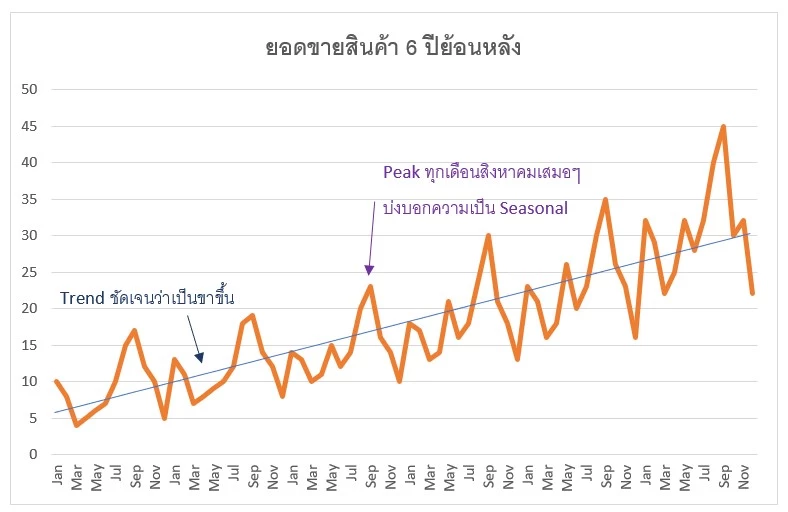

*อ้างอิง: บทความ Forecasting Model ด้วย Machine Learning ของ CORALINE*

วิธีการทดสอบ สามารถทดสอบด้วยวิธี Augmented Dickey–Fuller test (ADF)

#### Augmented Dickey–Fuller test (ADF)

ใน Python มี Package ที่ชื่อว่า adfuller ที่ใช้ในการทำหา p-value ของ ADF-Test ซึ่งถ้า p-value มีค่าน้อยกว่า 0.05 จะสามารถสรุปได้ว่า Time series นั้นเป็น Stationary ตัวอย่างการใช้งานของโค้ด จะแสดงด้านล่าง

สามารถดูรายละเอียดเพิ่มเติมได้ที่: 
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

---



## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams

## ดาวน์โหลดข้อมูล

ชุดข้อมูลที่ใช้คือข้อมูลของยอดขายแชมพูในระยะเวลา 3 ปี ของแชมพูจำนวน 36 ชิ้น 

In [ ]:
data_path = '../data/superstore.csv'
 
data = pd.read_csv(data_path,encoding = "ISO-8859-1")
data.head()

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
monthly_sales = data.groupby([pd.Grouper(key='Order Date', freq='ME'), 'Category'])['Sales'].sum()
monthly_sales.head()

In [ ]:
# กำหนดให้ดัชนี (index) ของ Dataframe เป็นหน่วยรายเดือน
sales_df = pd.DataFrame(monthly_sales).reset_index()
sales_df.head()

In [ ]:
monthly_sales_df = sales_df.pivot_table(index='Order Date', values='Sales', aggfunc='sum')
monthly_sales_df.index.name = 'Month'
monthly_sales_df.head()

# การสำรวจข้อมูลเบื้องต้น (EDA)

In [ ]:
# ตรวจสอบขนาดของข้อมูล
monthly_sales_df.shape

In [ ]:
# ค่าทางสถิติของชุดข้อมูล
monthly_sales_df.describe()

In [ ]:
monthly_sales_df

In [ ]:
# สร้างกราฟแสดงยอดขาย
monthly_sales_plot = monthly_sales_df.reset_index()
plt.figure(figsize=(10,6))
plt.plot(monthly_sales_plot['Sales'])
plt.show()

In [ ]:
# แปลงข้อมูลจากตัวเลขให้เป็นตัวอักษร เช่น เดือน 12 แปลงเป็น DEC
monthly_sales_plot['month'] = pd.to_datetime(monthly_sales_plot['Month']).dt.strftime('%b')

# สร้างกราฟ box plot เพื่อดูลักษณะของชุดข้อมูลแยกตามเดือน
sns.boxplot(x='month', y='Sales', data= monthly_sales_plot)


In [ ]:
# สร้างชุดข้อมูล
m1 = monthly_sales_plot['Sales'].iloc[:12].values
m2 = monthly_sales_plot['Sales'].iloc[12:24].values
m3 = monthly_sales_plot['Sales'].iloc[24:36].values
m4 = monthly_sales_plot['Sales'].iloc[36:48].values
# สร้างกราฟแสดงยอดขายแยกตามปี
fig = plt.figure(figsize = (20,10))
plt.plot(m1)
plt.plot(m2)
plt.plot(m3)
plt.plot(m4)

# สร้างชื่อแกนของกราฟ
plt.title('Sales 4 years ', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend(['2014','2015', '2016','2017'], fontsize=20)

1. **การแยกองค์ประกอบของข้อมูลอนุกรมเวลา** การแยกข้อมูล Time Series ทำให้เราสามารถวิเคราะห์ Time Series ได้ง่ายขึ้น เพราะในหลาย ๆ ครั้งเราต้องการทำนายเฉพาะส่วนหรือต้องการวิเคราะห์เฉพาะส่วนของ Time Series กล่าวคือในการวิเคราะห์จะสนใจองค์ประกอบเพียง 2 ตัวคือ Trend และ Seasonal เราสามารถสามารถแยกอนุกรมเวลาโดยพิจารณาโดยใช้ seasonal_decompose ในstatsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose# การแสดงกราฟของผลลัพธ์การแยกองค์ประกอบของข้อมูลด้วยวิธี Decomposition
decomposition = seasonal_decompose(monthly_sales_df)
rcParams['figure.figsize'] = 8, 6
decomposition.plot()
plt.show()

# Source: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [ ]:
# การสร้างกราฟ
plt.plot(monthly_sales_df)
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

# การใส่ชื่อของแกนและหัวข้อกราฟ
plt.title('Trend analysis ', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sale (Baht)', fontsize=14)
plt.legend(['Sale', 'Trend'], fontsize=14)

plt.show()

In [ ]:
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(monthly_sales_plot['Total Sales'], lags=24)
plt.show()

## ตรวจสอบ Stationary ด้วย Augmented Dickey–Fuller test (ADF)

สมติฐาน ของการทดสอบ

H0: Non Stationary

H1: Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(monthly_sales_df['Total Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

🔍 วิธีแปลผล ADF Test

- **ADF Statistic:** -4.4938  
    ค่านี้เป็นผลลัพธ์จากการทดสอบ ADF ซึ่งจะถูกนำไปเปรียบเทียบกับค่า critical value

- **p-value:** 0.00020  
    ค่านี้ต่ำกว่า 0.05 มาก แสดงว่ามีนัยสำคัญทางสถิติ → ปฏิเสธสมมุติฐานตั้งต้น (null hypothesis)

- **Critical Values:**  
    - ที่ระดับความเชื่อมั่น 1%: -3.5778  
    - ค่าที่ได้ (-4.4938) ต่ำกว่าค่า critical value ที่ 1%  
    ⇒ มีหลักฐานชัดเจนว่าข้อมูลชุดนี้เป็น Stationary

💡 ความหมายเชิงวิเคราะห์:

- ข้อมูลยอดขายรายเดือน **ไม่มีแนวโน้ม (trend)** หรือ **ฤดูกาลที่แรง**
- สามารถนำไปใช้กับโมเดลอย่าง **ARIMA** ได้เลย (ซึ่งต้องการข้อมูลที่ stationary)

## สร้างโมเดล ARIMA

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

In [ ]:
time_series_df = monthly_sales_df.reset_index()
time_series_df.rename(columns = {'Month': 'ds', 'Sales': 'y'}, inplace = True)
time_series_df['unique_id'] = 'all'
test = time_series_df.iloc[-6:]
train = time_series_df.iloc[:-6]
time_series_df.head()

In [ ]:
models = [AutoARIMA(season_length=12)]
sf_ARIMA = StatsForecast(models = models, freq='ME')
sf_ARIMA.fit(train)

In [ ]:
forecast_df = sf_ARIMA.forecast(df=train, level= [90], h = 6)
forecast_df

In [ ]:
sf_ARIMA.plot(time_series_df, forecast_df, level=[90])

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ดึงค่าพยากรณ์จาก forecast_df
y_pred = forecast_df['AutoARIMA'].values

# ดึงค่าจริงจาก test
y_true = test['y'].values

# คำนวณ MAE และ RMSE
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

| ตัวชี้วัด                          | ความหมาย                                                 | ยิ่งต่ำ ยิ่งดี? |
| ---------------------------------- | -------------------------------------------------------- | --------------- |
| **MAE** (Mean Absolute Error)      | ความคลาดเคลื่อนเฉลี่ยแบบสัมบูรณ์                         | ✅ ใช่           |
| **RMSE** (Root Mean Squared Error) | ความคลาดเคลื่อนเฉลี่ยกำลังสอง (เน้น penalize error ใหญ่) | ✅ ใช่           |




---



# พื้นที่สำหรับการทดลอง

🔧 Challenge เพิ่มเติม:

เปรียบเทียบ MAE และ RMSE ที่ได้กับ baseline (เช่น ค่าเฉลี่ย 6 เดือนหลัง)

ลองใช้ season_length ที่ต่างออกไป (เช่น 1 หรือ 6) แล้วดูว่า error ดีขึ้นหรือแย่ลง

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- ค่าทำนายจาก AutoARIMA ---
y_pred_arima = forecast_df['AutoARIMA'].values
y_true = test['y'].values

mae_arima = mean_absolute_error(y_true, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))

# --- Baseline: ใช้ค่าเฉลี่ย 6 เดือนล่าสุดจาก train ---
baseline_value = train['y'].iloc[-6:].mean()
y_pred_baseline = [baseline_value] * len(y_true)

mae_baseline = mean_absolute_error(y_true, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_true, y_pred_baseline))

# --- แสดงผลเปรียบเทียบ ---
print("📊 เปรียบเทียบ MAE และ RMSE")
print(f"AutoARIMA    - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")
print(f"Baseline AVG - MAE: {mae_baseline:.2f}, RMSE: {rmse_baseline:.2f}")


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test['ds'], y_true, label='Actual', marker='o')
plt.plot(test['ds'], y_pred_arima, label='AutoARIMA', marker='x')
plt.plot(test['ds'], y_pred_baseline, label='Baseline Avg', linestyle='--')
plt.title('Forecast vs Actual (ARIMA vs Baseline)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# เตรียมตัวแปรเก็บผลลัพธ์
results = []

# ลูปลอง season_length หลายค่า
for season in [1, 6, 12]:
    print(f"🔁 ลอง season_length = {season}")
    
    # สร้างโมเดล
    model = StatsForecast(
        models=[AutoARIMA(season_length=season)],
        freq='ME',
        n_jobs=1
    )
    
    # เทรน
    model_fit = model.fit(train)
    
    # พยากรณ์ 6 เดือน
    forecast = model_fit.predict(h=6)
    
    # ดึงค่าที่ใช้คำนวณ
    y_pred = forecast['AutoARIMA'].values
    y_true = test['y'].values
    
    # วัดค่า error
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"MAE = {mae:.2f}, RMSE = {rmse:.2f}\n")
    
    # เก็บผล
    results.append({'season_length': season, 'MAE': mae, 'RMSE': rmse})


| season\_length | MAE (ยิ่งต่ำยิ่งดี) | RMSE (ยิ่งต่ำยิ่งดี) |
| -------------- | ------------------- | -------------------- |
| `1`            | 36,029.70           | 42,500.49            |
| `6`            | 18,037.11           | 21,631.83            |
| `12`           | ✅ **15,716.51**     | ✅ **19,074.05**      |

✅ ข้อสรุปเชิงวิเคราะห์
- เมื่อ season_length = 12 (หมายถึงมีลักษณะ วนซ้ำทุก 12 เดือน) → ได้ค่าพยากรณ์ที่แม่นยำที่สุดทั้ง MAE และ RMSE

- แสดงว่า ยอดขายในธุรกิจนี้มี seasonality รายปีชัดเจน (เช่น ขายดีช่วงคริสต์มาส, ปีใหม่, ฤดูกาลท่องเที่ยว)

- ใช้ season_length = 1 ไม่สามารถจับรูปแบบ seasonality ได้ → error สูงมาก

